In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

from data_functions import *
from metric_functions import *
from helper_functions import *
from models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
dataset = load_data("./train")
labels = dataset.classes
train, val = trai_val_split(dataset, 0.8)

In [3]:
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=64, shuffle=True)

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

## Augumentacja danych

In [9]:
iters = [i for i in range(1, 11)]

### Odwracanie obrazków

In [5]:
transform_flip = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomVerticalFlip(0.5),
     transforms.RandomRotation(24),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_flip = load_data("./train", transform=transform_flip)
train_flip, val_flip = trai_val_split(dataset_flip, 0.8)

In [6]:
net_flip = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_flip, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_flip, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_flip.parameters(), lr=0.001)

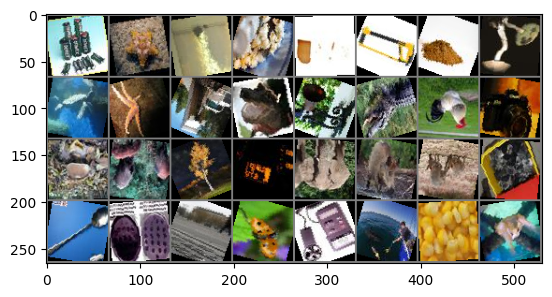

In [7]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [7]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_flip, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [02:48<00:00, 16.83s/it]


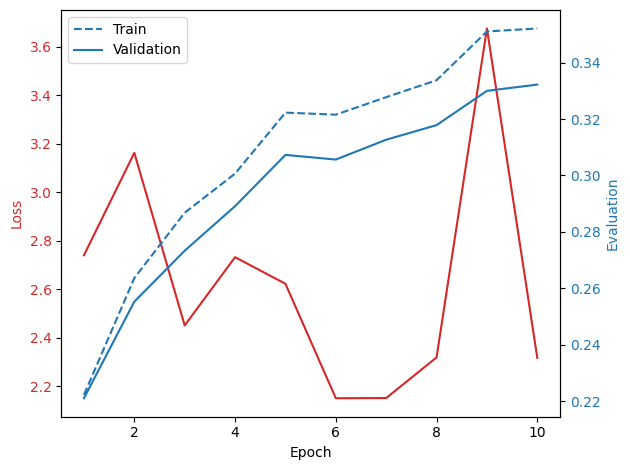

In [10]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Przekształcanie kolorów

In [11]:
transform_color = transforms.Compose(
    [transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_color = load_data("./train", transform=transform_color)
train_color, val_color = trai_val_split(dataset_color, 0.8)

In [12]:
net_color = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_color, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_color, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_color.parameters(), lr=0.001)

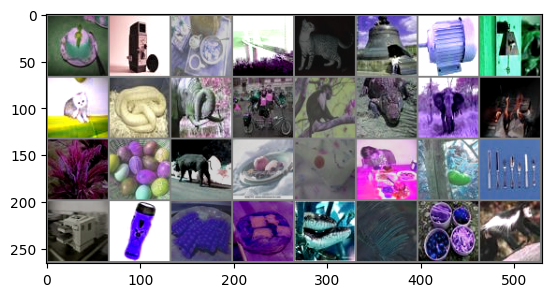

In [13]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [14]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_color, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [03:47<00:00, 22.79s/it]


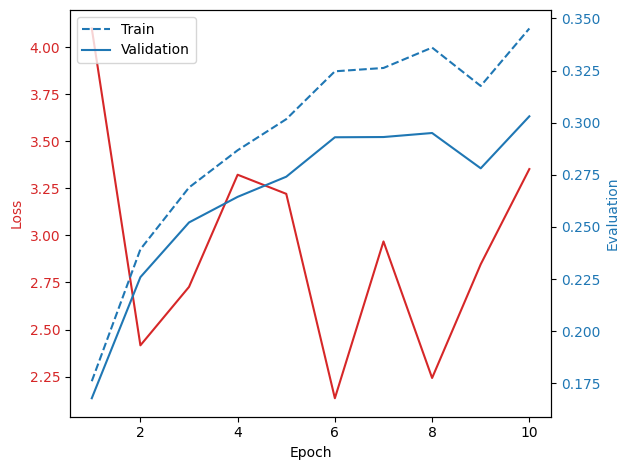

In [15]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Przycinanie obrazków

In [16]:
transform_crop = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_crop = load_data("./train", transform=transform_crop)
train_crop, val_crop = trai_val_split(dataset_crop, 0.8)

In [17]:
net_crop = Net(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_crop, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_crop, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_crop.parameters(), lr=0.001)

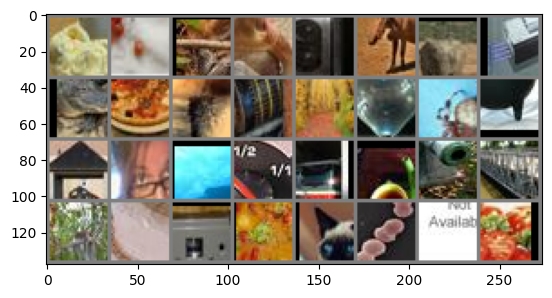

In [18]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [19]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_crop, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

  0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x400 and 2704x120)

In [ ]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Wymazywanie obrazków

In [20]:
transform_erase = transforms.Compose(
    [transforms.RandomErasing(0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_erase = load_data("./train", transform=transform_erase)
train_erase, val_erase = trai_val_split(dataset_erase, 0.8)

In [21]:
net_erase = Net(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_erase, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_erase, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_erase.parameters(), lr=0.001)

In [25]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 399, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 399, in <listcomp>
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torchvision/datasets/folder.py", line 231, in __getitem__
    sample = self.transform(sample)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 1731, in forward
    if value is not None and not (len(value) in (1, img.shape[-3])):
AttributeError: 'Image' object has no attribute 'shape'. Did you mean: 'save'?


In [23]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_erase, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

  0%|          | 0/10 [00:00<?, ?it/s]


AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 399, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 399, in <listcomp>
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torchvision/datasets/folder.py", line 231, in __getitem__
    sample = self.transform(sample)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 1731, in forward
    if value is not None and not (len(value) in (1, img.shape[-3])):
AttributeError: 'Image' object has no attribute 'shape'. Did you mean: 'save'?


In [ ]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

## Hiperparametry

In [ ]:
n_convs_values = [2, 4, 5]
kernel_size_values = [3, 5, 7]
stride_values = [1, 2, 3]
padding_values = [1, 2, 3]

In [ ]:
res = pd.DataFrame(columns=["n_convs", "kernel_size", "stride", "padding", "train_loss", "val_loss", "train_acc", "val_acc"])